In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('affair_data.csv')

In [3]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [4]:
X = data[data.columns[:-1]]
Y = data['affair']

In [5]:
model = LogisticRegression()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [12]:
model.fit(X_train, Y_train)
pred = model.predict_proba(X_test)

In [13]:
model.score(X_test, Y_test)

0.7319371727748691

In [143]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(Y_test, pred[:, 1])

In [140]:
def count_metrics(pred, Y_test):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for pr, act in zip( pred[:, 1], Y_test ):    
        if pr >= i:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if act == 1:
                tp += 1
            else:
                fp += 1

        else:
            if act == 1:
                fn += 1
            else: 
                tn += 1
    return tp, fp, fn, tn

In [141]:
tpr_1 = []
fpr_1 = []
precision = []
recall = []

for i in np.arange(0, 1, 0.05):
    tp, fp, fn, tn = count_metrics(pred, Y_test)
    tpr_1.append(tp/(tp+fn))
    fpr_1.append(fp/(fp+tn))
    
#     precision.append(tp/(tp+fp))
#     recall.append(tp/(tp+fn))
    

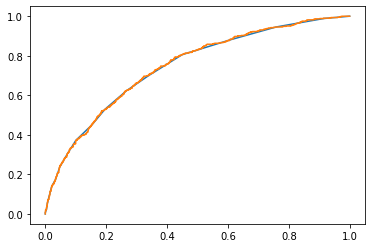

In [144]:
plt.plot(fpr_1, tpr_1)
plt.plot(fpr, tpr)